#**Implemented to Manthan**

#**Collecting Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 77 bytes


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 659M/675M [00:08<00:00, 161MB/s]
100% 675M/675M [00:08<00:00, 83.4MB/s]


In [ ]:
!cp -v -r '/content/cell-images-for-detecting-malaria.zip' '/content/drive/MyDrive/Malaria'

'/content/cell-images-for-detecting-malaria.zip' -> '/content/drive/MyDrive/Malaria/cell-images-for-detecting-malaria.zip'


In [ ]:
!unzip *.zip && rm -rf *.zip

In [ ]:
!unzip '/content/drive/MyDrive/Malaria/cell-images-for-detecting-malaria.zip'

#**Preprocessing Data**

In [ ]:
import glob
import numpy as np
from PIL import Image
import cv2
from tqdm import tqdm

In [ ]:
PARASITIZED = glob.glob('/content/cell_images/Parasitized/*.png')
UNINFECTED = glob.glob('/content/cell_images/Uninfected/*.png')

print('PARASITIZED:',len(PARASITIZED[:3500]))
print('UNINFECTED:', len(UNINFECTED[:3500]))

PARASITIZED: 3500
UNINFECTED: 3500


In [ ]:
dataset = []
label = []
id = 0

for img in PARASITIZED[:3500]:
  image = cv2.imread(img)
  image = Image.fromarray(image, 'RGB')
  image = image.resize((150, 150))
  dataset.append(np.array(image))
  label.append(1)
  id += 1
  print('[*] ',id)

In [ ]:
id = 0

for img in UNINFECTED[:3500]:
  image = cv2.imread(img)
  image = Image.fromarray(image, 'RGB')
  image = image.resize((150, 150))
  dataset.append(np.array(image))
  label.append(0)
  id += 1
  print('[*] ',id)

In [ ]:
print('Total Data:', len(dataset))

Total Data: 7000


In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, test_size = 0.1)

In [ ]:
from keras.utils import normalize

X_train = normalize(X_train, axis = 1)
X_test = normalize(X_test, axis = 1)

#**Model**

In [ ]:
input = (150, 150, 3)
kernel_s = (3, 3)
padding = 'same'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=kernel_s, input_shape=input, padding=padding, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 32, kernel_size=kernel_s, padding=padding, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))

model.add(Conv2D(filters = 64, kernel_size=kernel_s, padding=padding, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size=kernel_s, padding=padding, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.35))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 64)       

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=64, verbose=1, epochs=54, validation_data=(X_test, Y_test), shuffle=False)

Epoch 1/54
99/99 [==============================] - 12s 44ms/step - loss: 0.6968 - accuracy: 0.5032 - val_loss: 0.6966 - val_accuracy: 0.5314
Epoch 2/54
99/99 [==============================] - 4s 37ms/step - loss: 0.6849 - accuracy: 0.5562 - val_loss: 0.6711 - val_accuracy: 0.5771
Epoch 3/54
99/99 [==============================] - 4s 37ms/step - loss: 0.6314 - accuracy: 0.6299 - val_loss: 0.2374 - val_accuracy: 0.9071
Epoch 4/54
99/99 [==============================] - 4s 37ms/step - loss: 0.2095 - accuracy: 0.9311 - val_loss: 0.1472 - val_accuracy: 0.9500
Epoch 5/54
99/99 [==============================] - 4s 36ms/step - loss: 0.1564 - accuracy: 0.9486 - val_loss: 0.1452 - val_accuracy: 0.9500
Epoch 6/54
99/99 [==============================] - 4s 37ms/step - loss: 0.1389 - accuracy: 0.9521 - val_loss: 0.1418 - val_accuracy: 0.9514
Epoch 7/54
99/99 [==============================] - 4s 37ms/step - loss: 0.1261 - accuracy: 0.9564 - val_loss: 0.1409 - val_accuracy: 0.9486
Epoch 8/54
9

In [ ]:
model.save('/content/drive/MyDrive/Malaria/model.h5')

In [ ]:
model.save('model.h5')

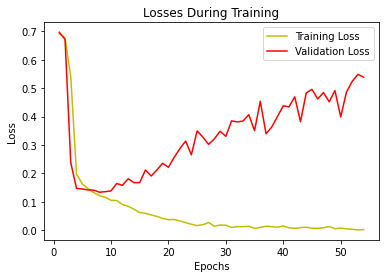

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'y', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title("Losses During Training")
plt.legend()
plt.show()

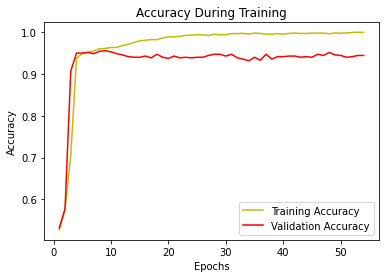

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'y', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title("Accuracy During Training")
plt.legend()
plt.show()

In [ ]:
_, acc = model.evaluate(X_test, Y_test)

22/22 [==============================] - 0s 9ms/step - loss: 0.5386 - accuracy: 0.9443


In [ ]:
print("Accuracy = {}%".format(round((acc * 100), 3)))

Accuracy = 94.429%


In [ ]:
len(X_test)

700

The Cell Is Not Infected So The Person Has Not Malaria.


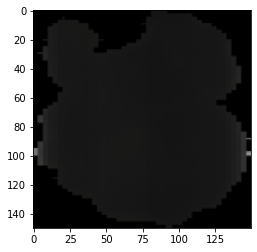

In [ ]:
n = 690

img = X_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0)

prediction = model.predict(input_img)
prediction = int(prediction)
if prediction == 0:
  print("The Cell Is Not Infected So The Person Has Not Malaria.")
elif prediction == 1:
  print("The Cell Is Infected So The Person Has Malaria.")
else:
  pass

The Cell Is Infected So The Person Has Malaria.


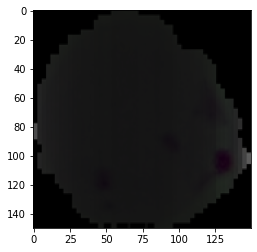

In [ ]:
n = 190

img = X_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0)

prediction = model.predict(input_img)
prediction = int(prediction)
if prediction == 0:
  print("The Cell Is Not Infected So The Person Has Not Malaria.")
elif prediction == 1:
  print("The Cell Is Infected So The Person Has Malaria.")
else:
  pass